# Summary
## Social_Network_Ads
Dataset on Social media ads describing users, whether users have purchased a product by clicking on the advertisements shown to them.
#### Reference: https://www.kaggle.com/akram24/social-network-ads

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset[0:11]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


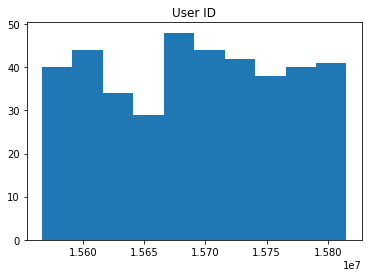

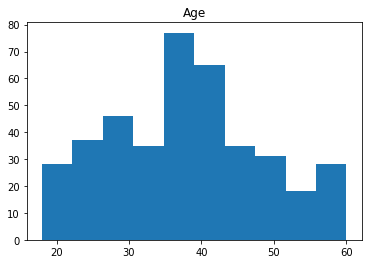

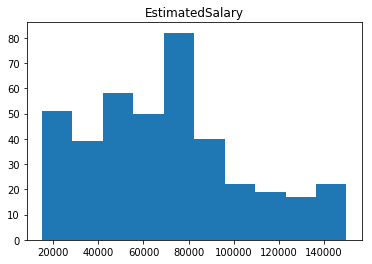

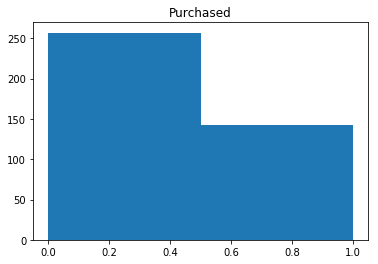

In [2]:
plt.figure(1)
plt.hist(dataset['User ID'], bins = 10)
plt.title('User ID')

plt.figure(2)
plt.hist(dataset['Age'], bins = 10)
plt.title('Age')

plt.figure(3)
plt.hist(dataset['EstimatedSalary'], bins = 10)
plt.title('EstimatedSalary')

plt.figure(4)
plt.hist(dataset['Purchased'], bins = 2)
plt.title('Purchased')
plt.show()

In [3]:
# Splitting the dataset into the Training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Comparing different classifiers

In [4]:
# Applying k-fold Cross Validation
from sklearn.model_selection import cross_val_score
def cv_score(clf, X, y, cv):
    scores = cross_val_score(estimator = clf, X = X, y = y, scoring = 'f1', cv = cv)
    plt.plot(scores, '-o')
    plt.axhline(scores.mean(), color = 'black', ls = '-')
    plt.axhline(scores.mean() + 2 * scores.std(), color = 'black', ls = '--')
    plt.axhline(scores.mean() - 2 * scores.std(), color = 'black', ls = '--')
    plt.xlabel('CV')
    plt.ylabel('F1 score')
    plt.title('Classifier: ' + clf.__class__.__name__)
    plt.show()
    return scores

## Logistic Regression

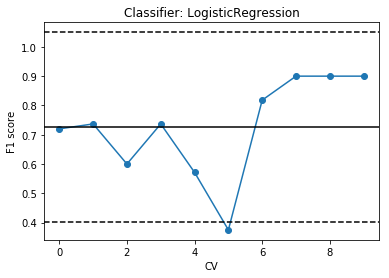

Logistic Regression: CV score = 0.726 (+/- 0.324); Test score = 0.814


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
classifier = LogisticRegression(solver = 'lbfgs', random_state = 0)
Logistic_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
Logistic_test_score = f1_score(y_test, classifier.predict(X_test))
print('Logistic Regression: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (Logistic_score.mean(), 2 * Logistic_score.std(), Logistic_test_score))

## Naive Bayes

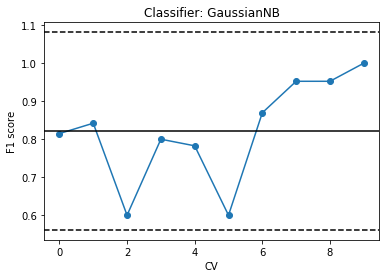

Naive Bayes: CV score = 0.821 (+/- 0.260); Test score = 0.833


In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
NB_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
NB_test_score = f1_score(y_test, classifier.predict(X_test))
print('Naive Bayes: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (NB_score.mean(), 2 * NB_score.std(), NB_test_score))

## LDA

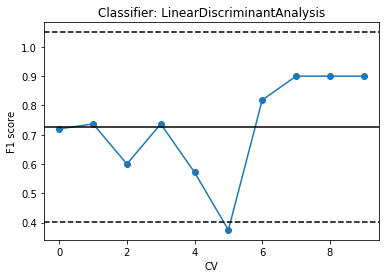

LDA: CV score = 0.726 (+/- 0.324); Test score = 0.833


In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
LDA_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
LDA_test_score = f1_score(y_test, classifier.predict(X_test))
print('LDA: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (LDA_score.mean(), 2 * LDA_score.std(), LDA_test_score))

## QDA

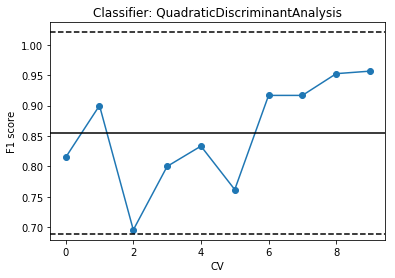

QDA: CV score = 0.855 (+/- 0.166); Test score = 0.875


In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
QDA_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
QDA_test_score = f1_score(y_test, classifier.predict(X_test))
print('QDA: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (QDA_score.mean(), 2 * QDA_score.std(), QDA_test_score))

## SVM

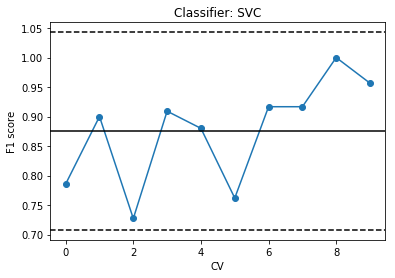

SVM: CV score = 0.875 (+/- 0.167); Test score = 0.892


In [9]:
from sklearn.svm import SVC
classifier = SVC(C = 1, kernel = 'rbf', gamma = 1, random_state = 0)
SVM_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
SVM_test_score = f1_score(y_test, classifier.predict(X_test))
print('SVM: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (SVM_score.mean(), 2 * SVM_score.std(), SVM_test_score))

## Decision Tree

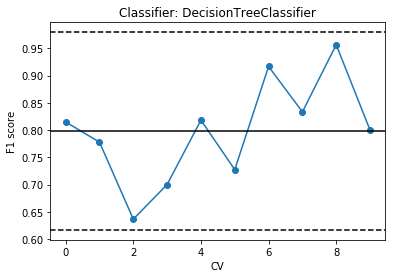

Decision Tree: CV score = 0.798 (+/- 0.181); Test score = 0.866


In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Tree_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
Tree_test_score = f1_score(y_test, classifier.predict(X_test))
print('Decision Tree: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (Tree_score.mean(), 2 * Tree_score.std(), Tree_test_score))

## Random Forest

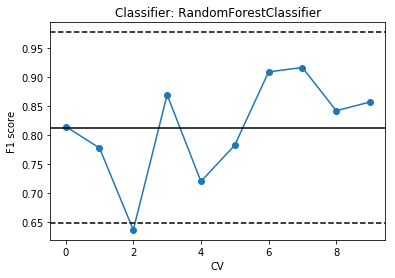

Random Forest: CV score = 0.813 (+/- 0.165); Test score = 0.862


In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Forest_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
Forest_test_score = f1_score(y_test, classifier.predict(X_test))
print('Random Forest: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (Forest_score.mean(), 2 * Forest_score.std(), Forest_test_score))

## ANN

Using TensorFlow backend.
W1129 23:01:25.860190  6268 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1129 23:01:25.887626  6268 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1129 23:01:25.891616  6268 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1129 23:01:25.991855  6268 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1129 23:01:26.022773  6268 deprecation_wrapper.py:119] Fr

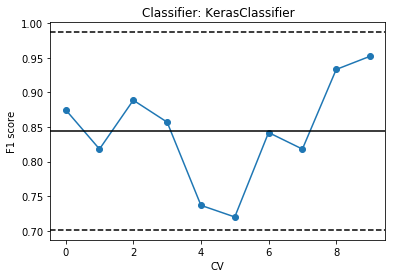

ANN: CV score = 0.844 (+/- 0.143); Test score = 0.892


In [12]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 200, verbose = 0)
ANN_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
ANN_test_score = f1_score(y_test, classifier.predict(X_test))
print('ANN: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (ANN_score.mean(), 2 * ANN_score.std(), ANN_test_score))

## CatBoost

In [13]:
# Applying k-fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
def cross_val(clf, X, y, n_splits = 5, plot_result = True):
    kf = KFold(n_splits = n_splits)
    scores = []
    for train_ind, val_ind in kf.split(X, y):
        X_train = X[train_ind]
        y_train = y[train_ind]        
        X_valid = X[val_ind]
        y_valid = y[val_ind]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)        
        score = f1_score(y_valid, y_pred)
        scores.append(score)
    scores = np.array(scores) 
    if(plot_result):
        plt.plot(scores, '-o')
        plt.axhline(scores.mean(), color = 'black', ls = '-')
        plt.axhline(scores.mean() + 2 * scores.std(), color = 'black', ls = '--')
        plt.axhline(scores.mean() - 2 * scores.std(), color = 'black', ls = '--')
        plt.xlabel('CV')
        plt.ylabel('F1 score')
        plt.title('Classifier: ' + clf.__class__.__name__)
        plt.show()   
        print(clf.__class__.__name__ + ' CV score = %0.3f (+/- %0.3f)' % (scores.mean(), 2 * scores.std()))
    return scores   

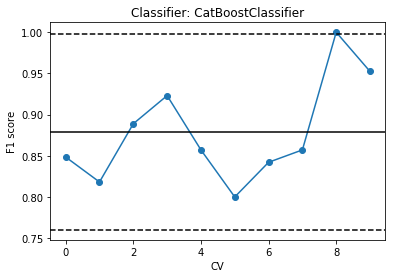

CatBoostClassifier CV score = 0.879 (+/- 0.119)
CatBoost: CV score = 0.879 (+/- 0.119); Test score = 0.892


In [14]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations = 7, learning_rate = 1, verbose = 0)
CatBoost_score = cross_val(clf = classifier, X = X_train, y = y_train, n_splits = 10)
classifier.fit(X_train, y_train)
CatBoost_test_score = f1_score(y_test, classifier.predict(X_test))
print('CatBoost: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (CatBoost_score.mean(), 2 * CatBoost_score.std(), CatBoost_test_score))

## Conclusion

In [15]:
print('Logistic Regression: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (Logistic_score.mean(), 2 * Logistic_score.std(), Logistic_test_score))
print('Naive Bayes: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (NB_score.mean(), 2 * NB_score.std(), NB_test_score))
print('LDA: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (LDA_score.mean(), 2 * LDA_score.std(), LDA_test_score))
print('QDA: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (QDA_score.mean(), 2 * QDA_score.std(), QDA_test_score))
print('SVM: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (SVM_score.mean(), 2 * SVM_score.std(), SVM_test_score))
print('Decision Tree: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (Tree_score.mean(), 2 * Tree_score.std(), Tree_test_score))
print('Random Forest: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (Forest_score.mean(), 2 * Forest_score.std(), Forest_test_score))
print('ANN: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (ANN_score.mean(), 2 * ANN_score.std(), ANN_test_score))
print('CatBoost: CV score = %0.3f (+/- %0.3f); Test score = %0.3f' % (CatBoost_score.mean(), 2 * CatBoost_score.std(), CatBoost_test_score))

Logistic Regression: CV score = 0.726 (+/- 0.324); Test score = 0.814
Naive Bayes: CV score = 0.821 (+/- 0.260); Test score = 0.833
LDA: CV score = 0.726 (+/- 0.324); Test score = 0.833
QDA: CV score = 0.855 (+/- 0.166); Test score = 0.875
SVM: CV score = 0.875 (+/- 0.167); Test score = 0.892
Decision Tree: CV score = 0.798 (+/- 0.181); Test score = 0.866
Random Forest: CV score = 0.813 (+/- 0.165); Test score = 0.862
ANN: CV score = 0.844 (+/- 0.143); Test score = 0.892
CatBoost: CV score = 0.879 (+/- 0.119); Test score = 0.892
